## Some exploratory regression and model building on national level youth female table tennis players physical testing
** note ** Read Readme_for_non_data_people for proper background on this data and tests done  

TLDR on data and how many samples there are:  
25 datapoints in sports science = "How did you get that many samples! Amazing!!"  
25 datapoints in statistics = "We want at least 30 samples to approximate normal distribution"  
25 datapoints in datascience = "That's not even a sample of a sample"  
This is indeed a convenience sample.  
But its also a sample that covers a large part of the population of national youth players in country X.  
Youth players are in the ages 14 to 19. A large part of what is found is quite possibly due to age differences.  
Age, however is not included here due to privacy concerns.  
Take the results for what they are. A pilot/exploration.  

In [1]:
#Never leave home without pandas and numpy
import pandas as pd
import numpy as np 

#Modelling libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

#Statistical testing
from scipy import stats

#Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("youth_female_tests_anon.csv")
df=df.drop("Unnamed: 0", axis=1)
df.head()

,triceps,biceps,rotation_H,rotation_V,deadlift_5RM,s_j_r,s_j_L,squat_hold_sec,nat_rank
0,7.28,14.60,22.46,16.62,52,125,101,82.0,1832
1,5.70,10.62,17.02,12.54,35,85,80,118.0,1849
2,7.00,16.48,22.60,21.44,75,148,143,99.0,2211
3,8.00,12.90,19.14,22.78,55,103,115,103.0,2148
4,7.44,12.01,20.10,16.10,70,115,117,94.0,2213


In [2]:
#renaming columns
df["rot_r"]=df["rotation_H"]
df["rot_l"]=df["rotation_V"]
df["dl_5"]=df["deadlift_5RM"]
df["sq_hold"]=df["squat_hold_sec"]
df["s_j_l"]=df["s_j_L"]


df=df.drop(["rotation_H", "rotation_V", "deadlift_5RM", "squat_hold_sec"], axis=1) #dropping old ones

df=df.loc[:, ['triceps', 'biceps', 'rot_r', 'rot_l', 'dl_5',
       's_j_r', 's_j_l', 'sq_hold', 'nat_rank']] #Sorting so target varible is last for convenience
df

,triceps,biceps,rot_r,rot_l,dl_5,s_j_r,s_j_l,sq_hold,nat_rank
0,7.28,14.60,22.46,16.62,52,125,101,82.0,1832
1,5.70,10.62,17.02,12.54,35,85,80,118.0,1849
2,7.00,16.48,22.60,21.44,75,148,143,99.0,2211
3,8.00,12.90,19.14,22.78,55,103,115,103.0,2148
4,7.44,12.01,20.10,16.10,70,115,117,94.0,2213
5,6.26,11.00,19.02,17.72,60,120,110,205.0,1427
6,7.02,9.56,16.30,13.86,35,93,90,78.0,1301
7,7.30,13.48,16.16,15.83,60,108,102,78.0,1251
8,8.32,15.36,26.64,22.10,55,116,115,45.0,1251
9,8.20,13.64,21.48,18.43,50,88,80,111.0,1813


In [3]:
#function for checking histograms of a given variable with 4 different binsizes
def bincheck(df, colname, bins=[5, 10, 15, 20]):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4)) #2x2 plots for 4 bins, making them fairly small so screen does not blow up
    fig.suptitle(f'Bin Comparison for {colname}', fontsize=16)

    sns.histplot(df, x=colname, stat="density", bins=bins[0], kde=True, ax=axes[0, 0]) #histogram with KDE for smoother distribution visualization
    axes[0, 0].set_title(f'Bins: {bins[0]}')

    sns.histplot(df, x=colname, stat="density", bins=bins[1], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title(f'Bins: {bins[1]}')

    sns.histplot(df, x=colname, stat="density", bins=bins[2], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title(f'Bins: {bins[2]}')

    sns.histplot(df, x=colname, stat="density", bins=bins[3], kde=True, ax=axes[1, 1])
    axes[1, 1].set_title(f'Bins: {bins[3]}')
    
    plt.tight_layout()
    plt.show()

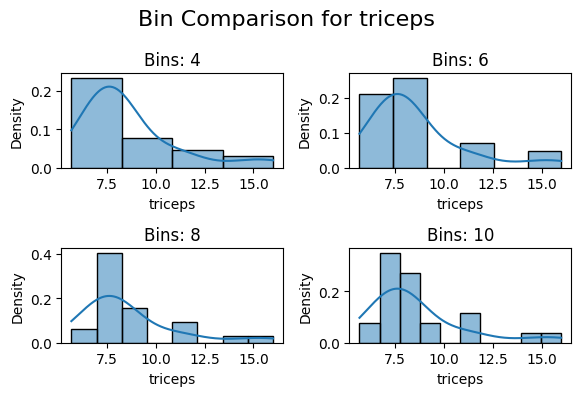

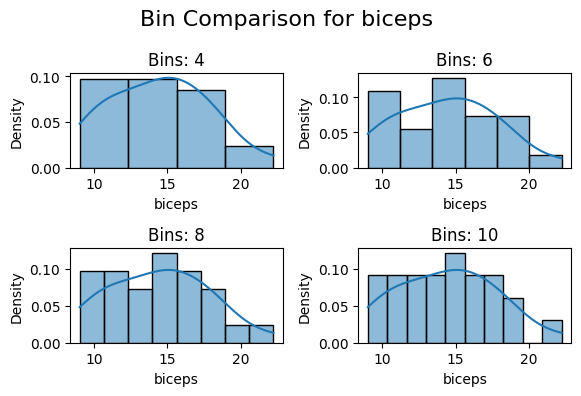

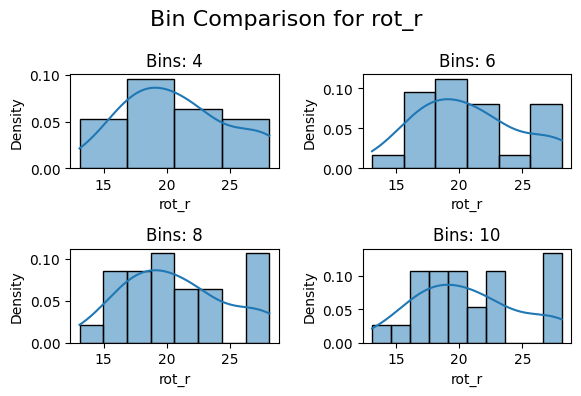

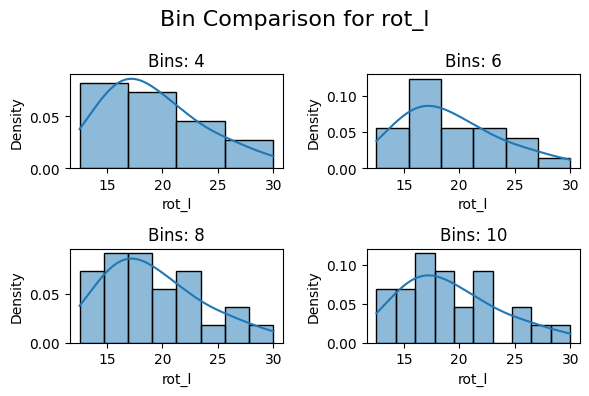

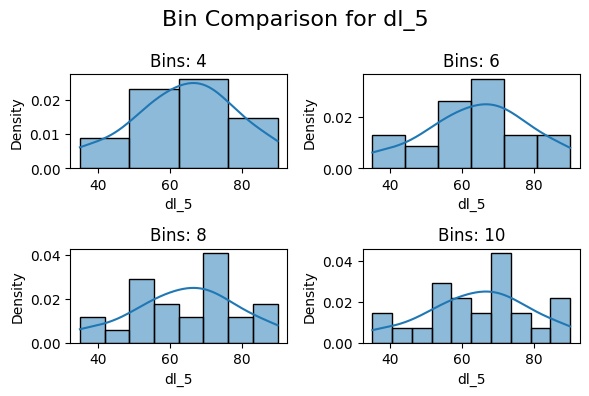

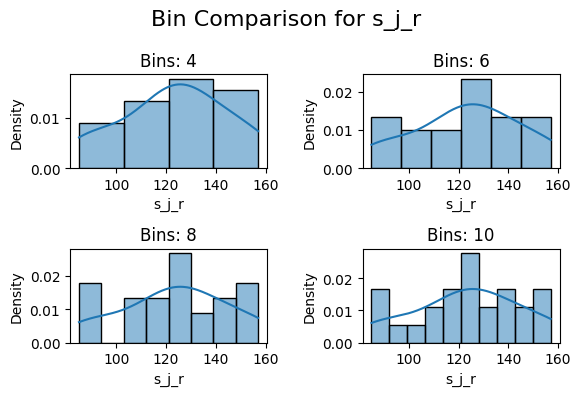

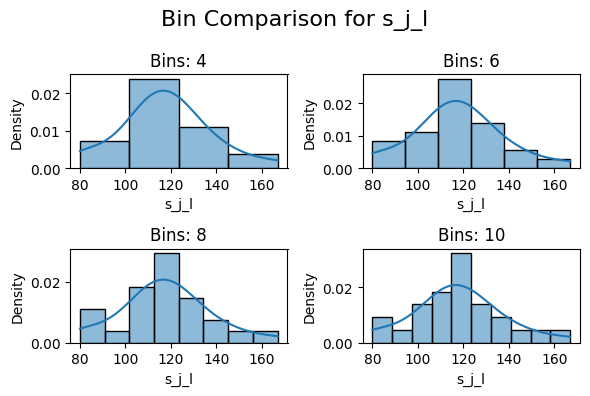

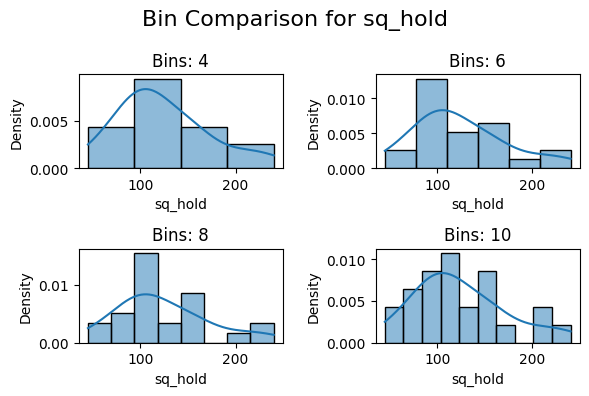

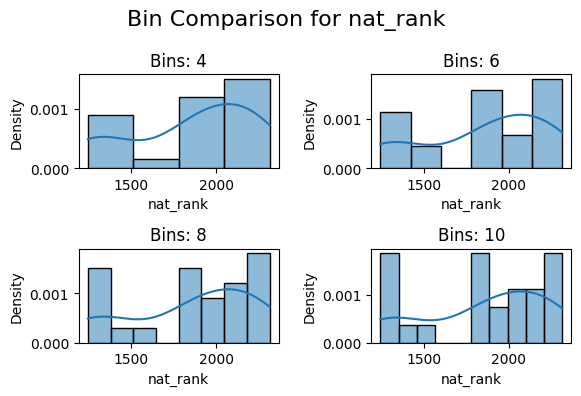

In [4]:
bins = [4, 6, 8, 10] #Having bigger bins with 25 samples seems unreasonable
cols=df.columns #checking all variables

for c in cols:
    bincheck(df, c, bins=bins)

As expected. Too few samples to have anything approaching a normal distribution.  
I might do a bootstrap model after fitting my bad model on original data to compare wether features have similar effects on outcomes.  
The possible 2 distributions on nat_rank is also worrying. Chances are we are looking at 2 age groups.  

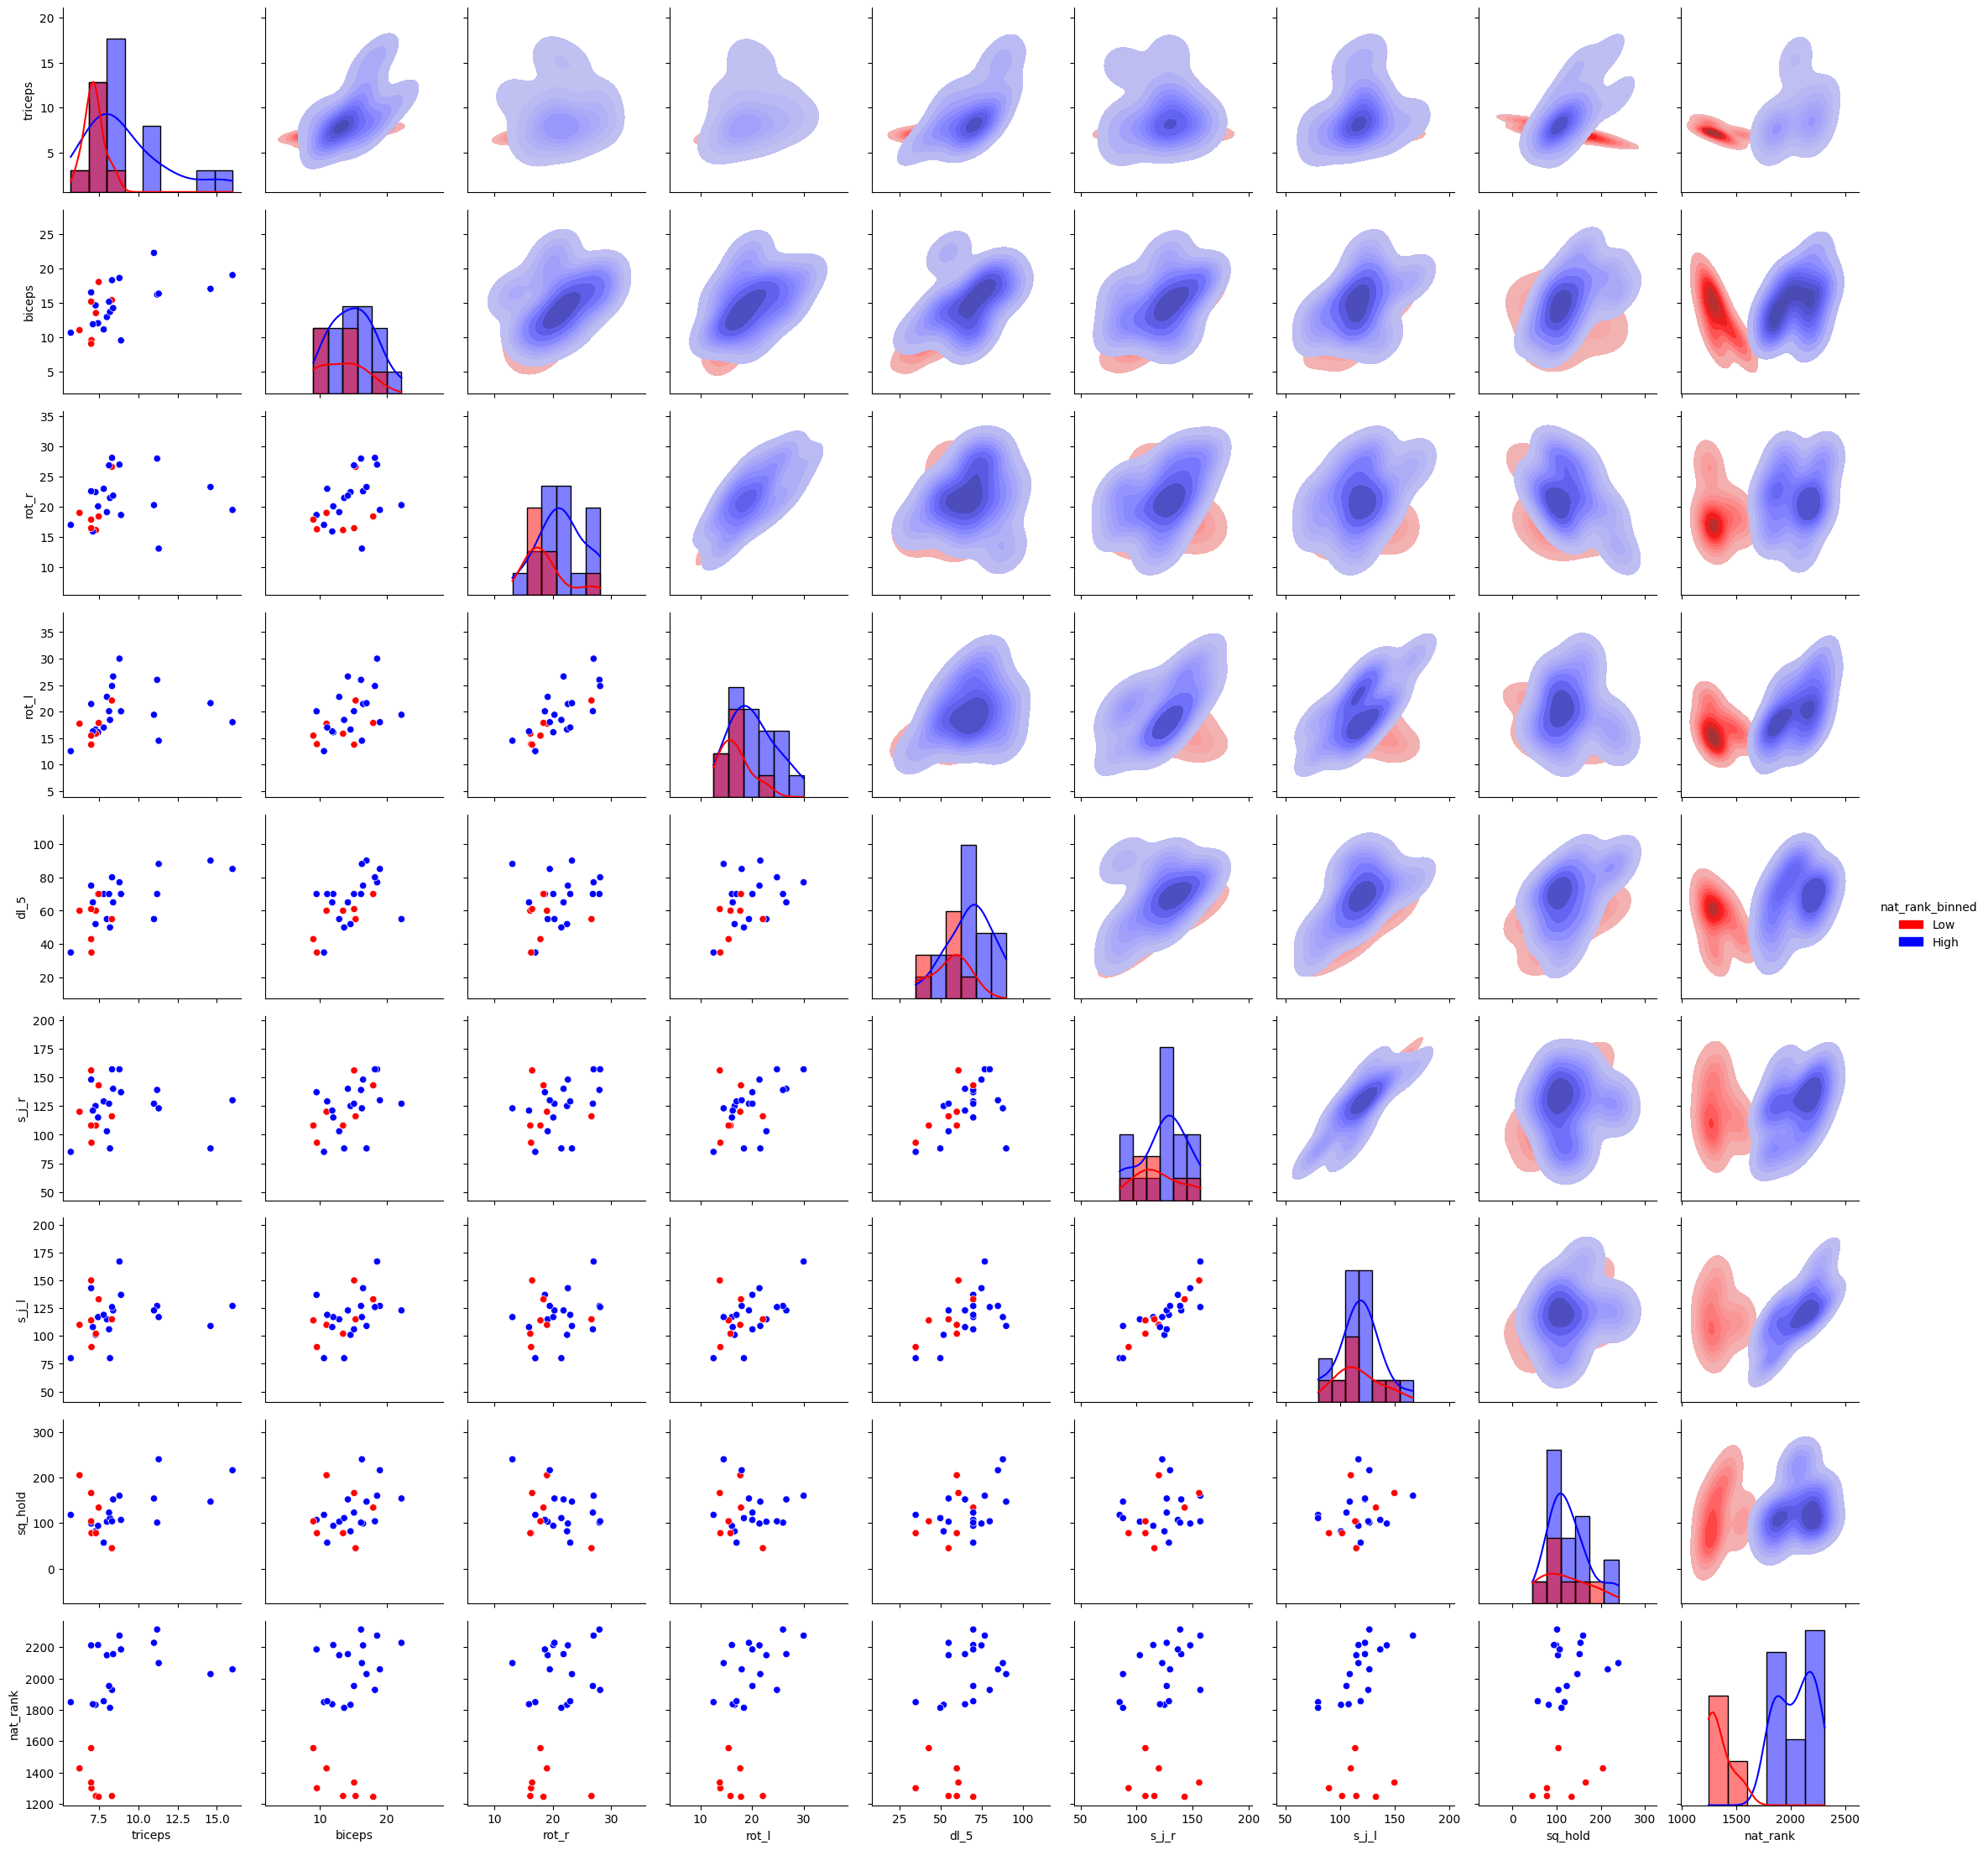

In [5]:
# Binning natrank into 2 categories for coloring! This is based on the earlier nat_rank histogram
df2=df.copy()
df2['nat_rank_binned'] = pd.cut(df2['nat_rank'], bins=2, labels=['Low', 'High']) #spliting nat_rank into 2 

#more or less stole this code from sns visualizing distribution guide.
g = sns.PairGrid(df2, hue='nat_rank_binned', palette=["red", "blue"]) #coloring depending on low (red) or high rank (blue)
g.map_lower(sns.scatterplot)  #scatter plot in the lower triange
g.map_upper(sns.kdeplot, fill=True)  #bivariate kde for another perspective
g.map_diag(sns.histplot, kde=True) #keeping histigram to make the bimodal nat_rank more visible
g.add_legend()
plt.show()

The bimodal distribution in nat_rank reallly seem to be two distinct performance groups when having nat_rank as your target.  
However the other tests covariance patterns show much more mixed results. This might not all be age differences.  
Some tests seem to be very linearly correlated with eachother. And most of those results make sense.  
One would expect someone with a good left legged side jump to do well on their right leg, same with rotation r/l and biceps/triceps.  

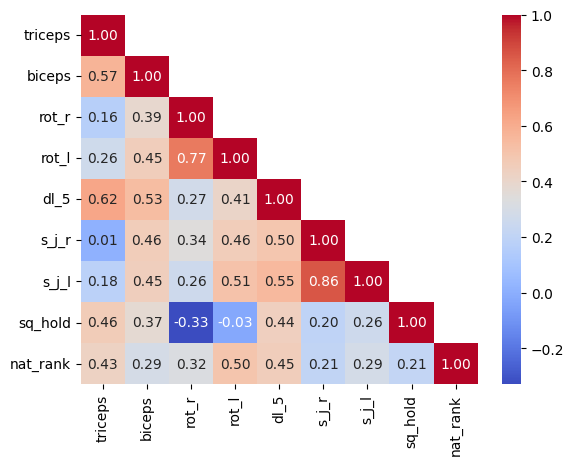

In [6]:
corrs=df.corr() #getting correlation coefs for all variables
#Hiding upper triangle
mask = np.triu(np.ones_like(corrs, dtype=bool), k=1)
sns.heatmap(corrs, annot=True, cmap="coolwarm", fmt=".2f",mask=mask) #Showing actual numbers with 2 decimals
plt.show()

When looking at hard numbers one can see the covariance patterns noted earlier  

**Most importantly:** None of the physical tests have a strong linear relationship with nat_rank (all r < 0.5).  
This is also expected as table tennis is a reactive, technical sport where tactics and playstyle matter more than how far you can jump.  

If there was a strong linear relationship between ranking and any single variable I would be worried, given earlier age concerns.  
Raw physical performance improve with age, especially during teen years so having a (few) variables with a strong relationship to ranking would imply  
we tested physical maturity rather than the phsycial slice of the "Total athlete pie"

*Note: Some unexpected correlations (e.g., squat hold and rotation_r at -0.33) are likely artifacts of small sample size rather than true physical relationships.*

## Cleaning

In [7]:
display(df.isna().sum())

triceps     0
biceps      0
rot_r       0
rot_l       0
dl_5        0
s_j_r       0
s_j_l       0
sq_hold     1
nat_rank    0
dtype: int64

One na value due to knee injury at time of test.  
Want to keep this row for since removing just one datapoint is quite big for this small dataset.  
And its even more concerning as the knee indjury might very well affect other performance measures, side jumps come to mind.  
Athlete said she had no issues with such movements though. It was the deep knee flexion that was the issue.
Ill take the tradeoff of getting a bad imputation.  

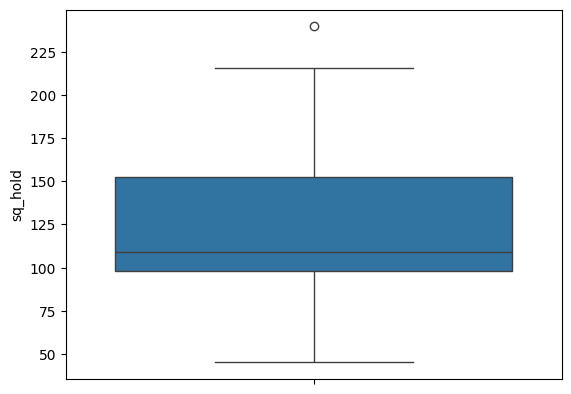

In [8]:
sns.boxplot(data=df, y="sq_hold")
plt.show()

Checking for outliers in squat hold to decide wether to use mean or median.
One outlier present. It is not a measurement error, but an athlete who was really good at squat holds.

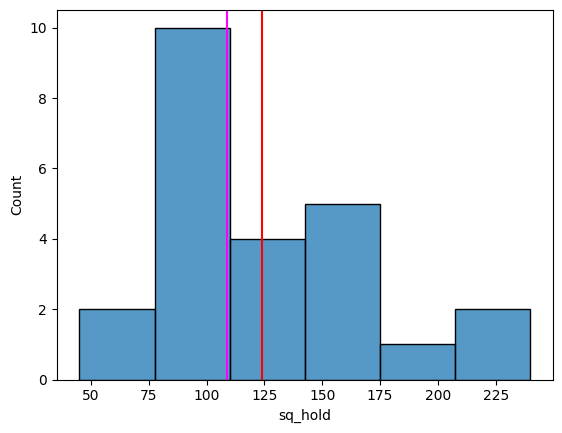

In [9]:
sns.histplot(data=df, x="sq_hold")
plt.axvline(df["sq_hold"].mean(), c="r")
plt.axvline(df["sq_hold"].median(), c="magenta")
plt.show()

As expected. Median seems more representative since outlier pulled the mean to the right of where most data is.  

In [10]:
df = df.fillna(df.median()) #filling the nullvalue with median

### Looking more closely on what we care about. Ranking.

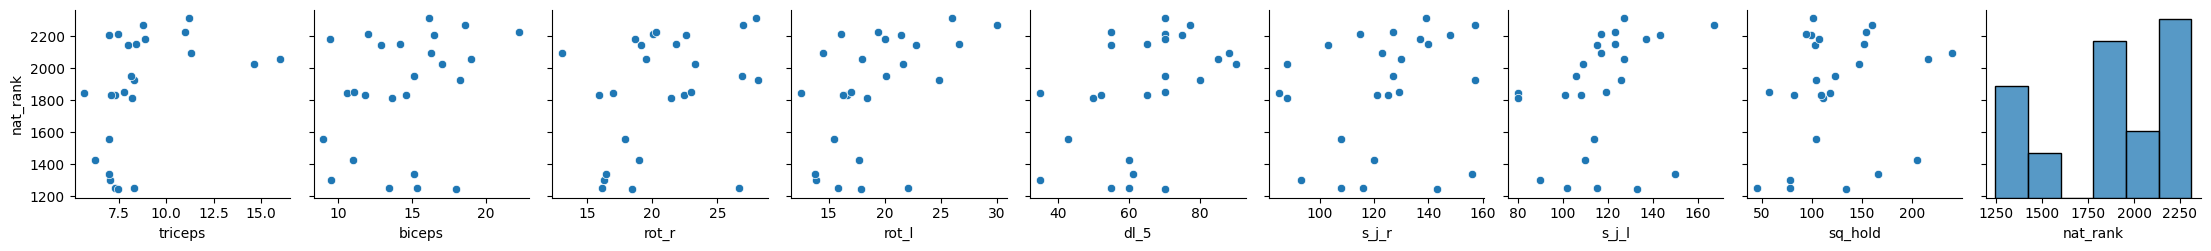

In [11]:
sns.pairplot(df,y_vars="nat_rank") #I love this method
plt.show()

### Good news!
Despite so few datapoints the relationship with national ranking looks vaguely logarithmic.  
This is a good indicator of face validity. We expect someone with low physical testing performance to perform worse in a given sport.  
However too much time spent doing physical training over actual sports training leads to diminishing returns.  

In [12]:
xcols=df.columns[:-1]

engi_df = df.copy() #making a copy in order to not mess up with view
engi_df[xcols] = np.sqrt(df[xcols]) #square rooting every datapoint apart from nat rank.
engi_df.head()

,triceps,biceps,rot_r,rot_l,dl_5,s_j_r,s_j_l,sq_hold,nat_rank
0,2.698148,3.820995,4.739198,4.076763,7.211103,11.180340,10.049876,9.055385,1832
1,2.387467,3.258834,4.125530,3.541186,5.916080,9.219544,8.944272,10.862780,1849
2,2.645751,4.059557,4.753946,4.630335,8.660254,12.165525,11.958261,9.949874,2211
3,2.828427,3.591657,4.374929,4.772840,7.416198,10.148892,10.723805,10.148892,2148
4,2.727636,3.465545,4.483302,4.012481,8.366600,10.723805,10.816654,9.695360,2213


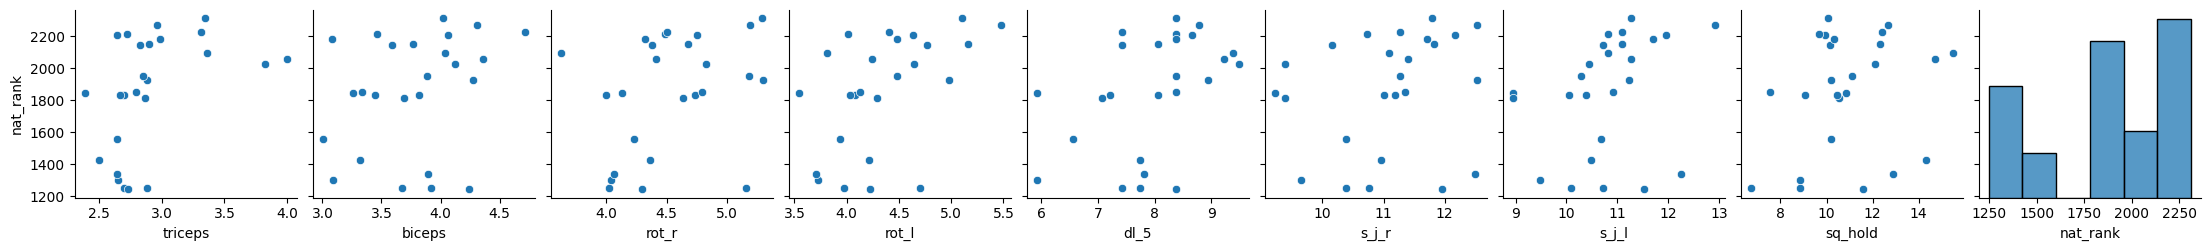

In [13]:
sns.pairplot(engi_df, y_vars="nat_rank")
plt.show()

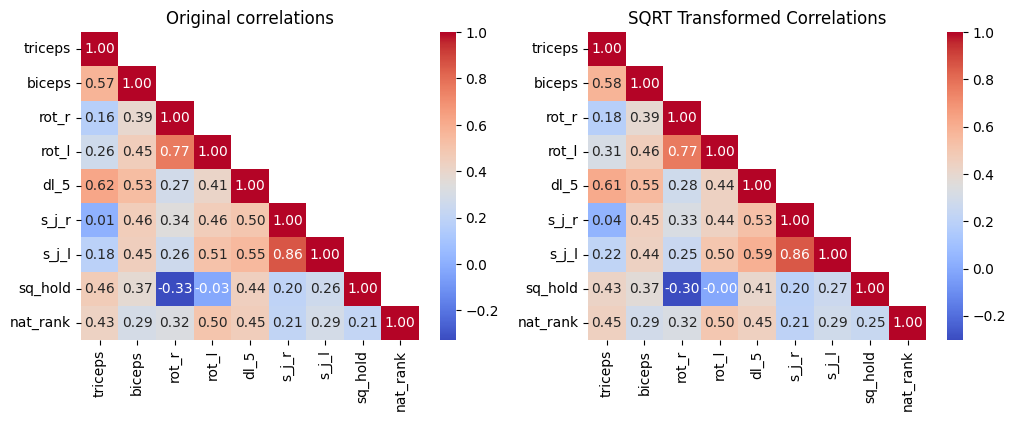

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) #making 2 heatmaps using the same code as first heatmap

sns.heatmap(corrs, annot=True, cmap="coolwarm", fmt=".2f",mask=mask, ax=ax1)
ax1.set_title("Original correlations")
engi_corrs=engi_df.corr()
sns.heatmap(engi_corrs, annot=True, cmap="coolwarm", fmt=".2f",mask=mask, ax=ax2)
ax2.set_title("SQRT Transformed Correlations")
plt.show()

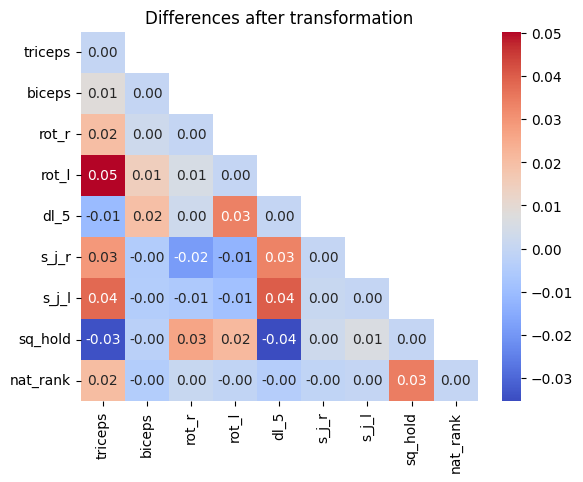

In [15]:
#same as above but showing differences more clearly
differences_after_transform=engi_corrs-corrs
sns.heatmap(differences_after_transform, annot=True, cmap="coolwarm", fmt=".2f",mask=mask)
plt.title("Differences after transformation")
plt.show()

Transformation made mostly small improvements in correlations while maintaining general shape of the relationships.  
This should help with linear modelling assumptions without distorting underlying data patterns

## Regression time!

Starting with original non engineered values.  
Keeping y in original scale for interpretability even if MSE will look terrible.  
Have to do some form of scaling as you cant compare ~14kg tricep with 120kg deadlift.  
Expect standard scaler to do better than minmax since these should be continuous normally distributed values if we had more samples.  

In [16]:
original_scale=StandardScaler() 
sc_original_lr=LinearRegression()

X=df.drop("nat_rank", axis=1) 
sc_X=original_scale.fit_transform(X) 
Y=df["nat_rank"] 

sc_original_lr.fit(sc_X,Y) 
y_pred = sc_original_lr.predict(sc_X)
mse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)


for x, c in zip(xcols,list(sc_original_lr.coef_)):
    print(x,c)
print("\nMean Squared Error (MSE):",int(mse)) #Int rounding mse as the need for precision is low with these numbers
print("R-squared (R²):", np.round(r2,4))

triceps 94.82893009077837
biceps -59.451055218323056
rot_r -19.454755592477092
rot_l 178.25063231358428
dl_5 60.525363880129255
s_j_r 14.665668173123048
s_j_l -28.549495940330868
sq_hold 29.088917427023155

Mean Squared Error (MSE): 78581
R-squared (R²): 0.3778


In [17]:

original_mmscale=MinMaxScaler()
mmsc_original_lr=LinearRegression()

Xmm=df.drop("nat_rank", axis=1)
mmsc_X=original_mmscale.fit_transform(Xmm)
Ymm=df["nat_rank"]

mmsc_original_lr.fit(mmsc_X,Ymm)
y_pred_mm = mmsc_original_lr.predict(mmsc_X)
mse_mm = mean_squared_error(Ymm, y_pred_mm)
r2_mm = r2_score(Ymm, y_pred_mm)


for x, c in zip(xcols,list(mmsc_original_lr.coef_)):
    print(x,c)
print("\nMean Squared Error (MSE):",int(mse_mm))
print("R-squared (R²):", np.round(r2_mm,4))
print("Checking if relationship is preserved with different scaling", r2/r2_mm)

triceps 406.179579463526
biceps -236.1044021490887
rot_r -71.44200717948672
rot_l 718.47225699966
dl_5 230.76054403767512
s_j_r 50.21301964406424
s_j_l -127.08151336318295
sq_hold 121.3899208943168

Mean Squared Error (MSE): 78581
R-squared (R²): 0.3778
Checking if relationship is preserved with different scaling 1.000000000000001


Some negative slopes! All of them from the "pair tests"   
Biceps/triceps=Arm  
rot_r/rot_l=Rotational strength  
s_j_l/s_j_r=Sideway jump right/left leg  
Might need to engineer those a bit.  
R²= 0.38 is still pretty good.  
And frankly I wouldnt expect that much more from raw physical tests given how many variables affect table tennis.  
I'd be really worried if we went past 0.50.  

Relationship is the same when testing MinMax scaler. Ill stick to standardscaler since "one std increase in feature x should roughly help ranking by y"   
is more actionable and easier to understand than "going from worst to best should roughly help ranking by y"  

Square rooted features up next!

In [18]:
engi_lr=LinearRegression()

X_sq=engi_df.drop("nat_rank", axis=1)
Y_sq=engi_df["nat_rank"]

sq_scaler=StandardScaler()
X_sq=sq_scaler.fit_transform(X_sq)


engi_lr.fit(X_sq,Y_sq)
y_pred_sq = engi_lr.predict(X_sq)
mse_sq = mean_squared_error(Y_sq, y_pred_sq)
r2_sq = r2_score(Y_sq, y_pred_sq)

for x, c in zip(xcols,list(engi_lr.coef_)):
    print(x,c)
print("\nMean Squared Error (MSE):",int(mse_sq))
print("R-squared (R²):", np.round(r2_sq,4))


triceps 101.18319922094436
biceps -80.02489210407843
rot_r 12.663521959590474
rot_l 158.49834921347463
dl_5 48.848028681384946
s_j_r 18.48580901532905
s_j_l -29.25801496525909
sq_hold 63.00645430060851

Mean Squared Error (MSE): 77178
R-squared (R²): 0.3889


Slightly better MSE and R² but we still have those negative values (apart from rotation, but 12/158 makes no sense either)  
The paired features really show some collinearity issues.  
Starting to see if asymmetry is a an issue. Then ratio.  
Will keep those that perform best and see if I can make a better model.


### Feature engineering

In [19]:
df_engi_feat=engi_df.copy()

#Engineering features
df_engi_feat["jump_asym"] = (engi_df['s_j_r'] - engi_df['s_j_l']).abs() 
df_engi_feat["arm_asym"] = (engi_df['biceps'] - engi_df['triceps']).abs() 
df_engi_feat["rot_asym"] = (engi_df['rot_r'] - engi_df['rot_l']).abs() 


#dropping old cols and sorting new ones.
df_engi_feat.drop("biceps", axis=1, inplace=True)
df_engi_feat.drop("triceps", axis=1, inplace=True)
df_engi_feat.drop("rot_r", axis=1, inplace=True)
df_engi_feat.drop("rot_l", axis=1, inplace=True)
df_engi_feat.drop("s_j_l", axis=1, inplace=True)
df_engi_feat.drop("s_j_r", axis=1, inplace=True)
df_engi_feat=df_engi_feat.loc[:, ['arm_asym', 'rot_asym',"jump_asym", 'dl_5', 'sq_hold', 'nat_rank']]

feat_engi_cols=df_engi_feat.columns[:-1]

df_engi_feat.head()

,arm_asym,rot_asym,jump_asym,dl_5,sq_hold,nat_rank
0,1.122847,0.662435,1.130464,7.211103,9.055385,1832
1,0.871367,0.584344,0.275273,5.916080,10.862780,1849
2,1.413805,0.123611,0.207264,8.660254,9.949874,2211
3,0.763230,0.397911,0.574914,7.416198,10.148892,2148
4,0.737908,0.470822,0.092849,8.366600,9.695360,2213


In [20]:
feat_engi_lr = LinearRegression()
scaler_engi_feat = StandardScaler()

X_feat_engi = df_engi_feat.drop("nat_rank", axis=1)
Y_feat_engi = df_engi_feat["nat_rank"]

X_scaled_feat_engi = scaler_engi_feat.fit_transform(X_feat_engi)
feat_engi_lr.fit(X_scaled_feat_engi, Y_feat_engi)
y_pred_feat_engi = feat_engi_lr.predict(X_scaled_feat_engi)

for x, c in zip(feat_engi_cols,list(feat_engi_lr.coef_)):
    print(x,c)

mse_feat_eng = mean_squared_error(Y_feat_engi, y_pred_feat_engi)
r2_feat_eng = r2_score(Y_feat_engi, y_pred_feat_engi)

print("\nMean Squared Error (MSE):",int(mse_feat_eng))
print("R-squared (R²):", np.round(r2_feat_eng,4))

arm_asym -41.599451640930766
rot_asym 87.08651528180141
jump_asym -6.511019906056092
dl_5 164.97918940873282
sq_hold 52.20479206517426

Mean Squared Error (MSE): 92578
R-squared (R²): 0.267


This was overall a much worse model with R²=0.27.  
But the rotational asymmetry is interesting. 
It might be that pushing the rotational direction of a player's forehand is relevant for performance.  
In general, physical training programs tend to do similar work on both sides or "clean up asymmetries" those things might need to be reconsidered.  

WIll try and use rotational asymmetry in a combined model later.

In [21]:
df_engi_feat2=engi_df.copy()

#making new features
df_engi_feat2["jump_ratio"] = (engi_df['s_j_r'] / engi_df['s_j_l']) 
df_engi_feat2["arm_ratio"] = (engi_df['biceps'] / engi_df['triceps'])
df_engi_feat2["rot_ratio"] = (engi_df['rot_r'] / engi_df['rot_l'])

#dropping old features and sorting
df_engi_feat2.drop("biceps", axis=1, inplace=True)
df_engi_feat2.drop("triceps", axis=1, inplace=True)
df_engi_feat2.drop("rot_r", axis=1, inplace=True)
df_engi_feat2.drop("rot_l", axis=1, inplace=True)
df_engi_feat2.drop("s_j_l", axis=1, inplace=True)
df_engi_feat2.drop("s_j_r", axis=1, inplace=True)
df_engi_feat2=df_engi_feat2.loc[:, ['arm_ratio' ,"rot_ratio",'jump_ratio', 'dl_5', 'sq_hold', 'nat_rank']]

feat_engi_cols2=df_engi_feat2.columns[:-1]

df_engi_feat2.head()

,arm_ratio,rot_ratio,jump_ratio,dl_5,sq_hold,nat_rank
0,1.416155,1.162490,1.112485,7.211103,9.055385,1832
1,1.364975,1.165014,1.030776,5.916080,10.862780,1849
2,1.534368,1.026696,1.017332,8.660254,9.949874,2211
3,1.269843,0.916630,0.946389,7.416198,10.148892,2148
4,1.270530,1.117339,0.991416,8.366600,9.695360,2213


In [22]:
feat_engi2_lr = LinearRegression()
scaler_feat_engi2 = StandardScaler()

X_feat_engi2 = df_engi_feat2.drop("nat_rank", axis=1)
Y_feat_engi2 = df_engi_feat2["nat_rank"]

X_scaled_feat_engi_2 = scaler_feat_engi2.fit_transform(X_feat_engi2)
feat_engi2_lr.fit(X_scaled_feat_engi_2, Y_feat_engi2)
y_pred_feat_engi2 = feat_engi2_lr.predict(X_scaled_feat_engi_2)

for x, c in zip(feat_engi_cols2,list(feat_engi2_lr.coef_)):
    print(x,c)

mse_feat_eng2 = mean_squared_error(Y_feat_engi2, y_pred_feat_engi2)
r2_feat_eng2 = r2_score(Y_feat_engi2, y_pred_feat_engi2)

print("\nMean Squared Error (MSE):",int(mse_feat_eng2))
print("R-squared (R²):", np.round(r2_feat_eng2,4))

arm_ratio -64.16472897410975
rot_ratio -58.39492717969681
jump_ratio 16.257986576675457
dl_5 132.53637174751216
sq_hold 8.095951370906239

Mean Squared Error (MSE): 94312
R-squared (R²): 0.2532


Worse R² and mse and weird coefficients.  
This model just ended up with "deadlifts are good"  
Ratio seems like a bad idea.  

Ill do a "total body part" as well and then call it on the feature engineering for now.

In [23]:
df_engi_feat3=engi_df.copy()

#Making new features
df_engi_feat3["total_jump"] = (engi_df['s_j_r'] + engi_df['s_j_l']) 
df_engi_feat3["total_arm"] = (engi_df['biceps'] + engi_df['triceps'])
df_engi_feat3["total_core"] = (engi_df['rot_r'] + engi_df['rot_l'])
df_engi_feat3["total_legs"] = (engi_df['sq_hold'] + engi_df['dl_5'])

#dropping old ones and sorting
df_engi_feat3.drop("biceps", axis=1, inplace=True)
df_engi_feat3.drop("triceps", axis=1, inplace=True)
df_engi_feat3.drop("rot_r", axis=1, inplace=True)
df_engi_feat3.drop("rot_l", axis=1, inplace=True)
df_engi_feat3.drop("s_j_l", axis=1, inplace=True)
df_engi_feat3.drop("s_j_r", axis=1, inplace=True)
df_engi_feat3.drop("sq_hold", axis=1, inplace=True)
df_engi_feat3.drop("dl_5", axis=1, inplace=True)

df_engi_feat3=df_engi_feat3.loc[:, ['total_arm' ,"total_core",'total_jump', 'total_legs','nat_rank']]

feat_engi_cols3=df_engi_feat3.columns[:-1]


df_engi_feat3.head()


,total_arm,total_core,total_jump,total_legs,nat_rank
0,6.519142,8.815962,21.230216,16.266488,1832
1,5.646301,7.666717,18.163816,16.778860,1849
2,6.705308,9.384280,24.123786,18.610128,2211
3,6.420084,9.147768,20.872697,17.565090,2148
4,6.193181,8.495783,21.540459,18.061960,2213


In [24]:
feat_engi3_lr = LinearRegression()
scaler_feat_engi3 = StandardScaler()

X_feat_engi3 = df_engi_feat3.drop("nat_rank", axis=1)
Y_feat_engi3 = df_engi_feat3["nat_rank"]

X_scaled_feat_engi_3 = scaler_feat_engi3.fit_transform(X_feat_engi3)
feat_engi3_lr.fit(X_scaled_feat_engi_3, Y_feat_engi3)
y_pred_feat_engi3 = feat_engi3_lr.predict(X_scaled_feat_engi_3)

for x, c in zip(feat_engi_cols3,list(feat_engi3_lr.coef_)):
    print(x,c)

mse_feat_eng3 = mean_squared_error(Y_feat_engi3, y_pred_feat_engi3)
r2_feat_eng3 = r2_score(Y_feat_engi3, y_pred_feat_engi3)

print("\nMean Squared Error (MSE):",int(mse_feat_eng3))
print("R-squared (R²):", np.round(r2_feat_eng3,4))

total_arm 7.741437281508665
total_core 167.90414489577705
total_jump -37.5962015391775
total_legs 135.349882510578

Mean Squared Error (MSE): 85011
R-squared (R²): 0.3269


Going back up finally!
Total core and total legs are interesting.  
Not sure if total legs would add anything over squat and deadlift separatley though    
And same with total core. Maybe asym or just left rotation is best.  

I should have made a model building function. This expanded a bit from what originally intended.  

### Combined engineered features testing

All in sqrt!
1. **Baseline + asymmetry**: All original individual features + rot_asym + jump_asym
2. **Selective + asymmetry**: Best individual features (rot_l, s_j_r, dl_5, sq_hold) + rot_asym
3. **Top performing slopes**: Paired features (rot_l/r, s_j_l/r) + both asymmetries + dl_5 + sq_hold

In [25]:
#base and asym
base_and_asym=engi_df.copy()
base_and_asym["rot_asym"]=df_engi_feat["rot_asym"]
base_and_asym["jump_asym"]=df_engi_feat["jump_asym"]

cols = list(base_and_asym.columns)
cols.insert(0, cols.pop(cols.index("rot_asym")))  # Move to front
cols.insert(1, cols.pop(cols.index("jump_asym")))   # Move to position 1
base_and_asym = base_and_asym[cols]

base_and_asym_cols=base_and_asym.columns[:-1]

base_and_asym.head()

,rot_asym,jump_asym,triceps,biceps,rot_r,rot_l,dl_5,s_j_r,s_j_l,sq_hold,nat_rank
0,0.662435,1.130464,2.698148,3.820995,4.739198,4.076763,7.211103,11.180340,10.049876,9.055385,1832
1,0.584344,0.275273,2.387467,3.258834,4.125530,3.541186,5.916080,9.219544,8.944272,10.862780,1849
2,0.123611,0.207264,2.645751,4.059557,4.753946,4.630335,8.660254,12.165525,11.958261,9.949874,2211
3,0.397911,0.574914,2.828427,3.591657,4.374929,4.772840,7.416198,10.148892,10.723805,10.148892,2148
4,0.470822,0.092849,2.727636,3.465545,4.483302,4.012481,8.366600,10.723805,10.816654,9.695360,2213


In [26]:
base_and_asym_lr = LinearRegression()
base_and_asym_sc = StandardScaler()

X_feat_base_and_asym = base_and_asym.drop("nat_rank", axis=1)
Y_feat_base_and_asym = base_and_asym["nat_rank"]

X_sc_base_and_asym = base_and_asym_sc.fit_transform(X_feat_base_and_asym)
base_and_asym_lr.fit(X_sc_base_and_asym, Y_feat_base_and_asym)
y_p_base_and_asym = base_and_asym_lr.predict(X_sc_base_and_asym)

for x, c in zip(base_and_asym_cols,list(base_and_asym_lr.coef_)):
    print(x,c)

mse_base_and_asym = mean_squared_error(Y_feat_base_and_asym, y_p_base_and_asym)
r2_base_and_asym = r2_score(Y_feat_base_and_asym, y_p_base_and_asym)

print("\nMean Squared Error (MSE):",int(mse_base_and_asym))
print("R-squared (R²):", np.round(r2_base_and_asym,4))

rot_asym 128.51669962699083
jump_asym -54.22428941794527
triceps 95.16082928543227
biceps -36.97874681327686
rot_r -95.21735323470787
rot_l 241.99227028773203
dl_5 89.76785956512413
s_j_r 22.5513964172342
s_j_l -57.47860772065273
sq_hold 53.269036121303515

Mean Squared Error (MSE): 68399
R-squared (R²): 0.4584


This is almost too good with R² ~ 0.46
And also sort off cheating since the asym features are built of 2 of the paired features.  
If i were to use this kind of model I'd need to remove some of the paired features again in order to avoid double counting.  

In [27]:
select_asym=engi_df[["triceps","rot_l", "dl_5", "sq_hold"]].copy()

select_asym[["rot_asym", "nat_rank"]]=df_engi_feat[["rot_asym", "nat_rank"]]

select_asym_cols=select_asym.columns[:-1]
select_asym.head()

,triceps,rot_l,dl_5,sq_hold,rot_asym,nat_rank
0,2.698148,4.076763,7.211103,9.055385,0.662435,1832
1,2.387467,3.541186,5.916080,10.862780,0.584344,1849
2,2.645751,4.630335,8.660254,9.949874,0.123611,2211
3,2.828427,4.772840,7.416198,10.148892,0.397911,2148
4,2.727636,4.012481,8.366600,9.695360,0.470822,2213


In [28]:
select_asym_lr = LinearRegression()
select_asym_sc = StandardScaler()

X_feat_select_asym= select_asym.drop("nat_rank", axis=1)
Y_feat_select_asym = select_asym["nat_rank"]

X_sc_select_asym = select_asym_sc.fit_transform(X_feat_select_asym)
select_asym_lr.fit(X_sc_select_asym, Y_feat_select_asym)
y_p_select_asym = select_asym_lr.predict(X_sc_select_asym)

for x, c in zip(select_asym_cols,list(select_asym_lr.coef_)):
    print(x,c)

mse_select_asym = mean_squared_error(Y_feat_select_asym, y_p_select_asym)
r2_select_asym = r2_score(Y_feat_select_asym, y_p_select_asym)

print("\nMean Squared Error (MSE):",int(mse_select_asym))
print("R-squared (R²):", np.round(r2_select_asym,4))

triceps 85.6344565650783
rot_l 135.7667594783125
dl_5 44.096095020810836
sq_hold 64.84932180008731
rot_asym 86.52926150338507

Mean Squared Error (MSE): 74199
R-squared (R²): 0.4125


This one i like!  
Not too many variables but really reasonable R² and captures the idea of "we are fine with rotational asymetry, actually we like extra oomph in your forehand rotation".   
I tried replacing triceps with biceps for fun but lost 0.05 R² and got a negative slope. I'm almost ready to scrap bicep testing for future testing sessions.  
It also lines up with some coaches complaining about athletes hitting their face with their bats due to lack of tricep strength and or control  
I also like that squat hold is telling us more about the legs than deadlifts. The test was meant to mimic how you feel in your legs after a long rally or a full  tournament of constant half squatting.  


In [29]:
#hand picked top performers
top_slopes=engi_df[["dl_5", "sq_hold"]].copy()
top_slopes["rot_asym"]=df_engi_feat["rot_asym"]
top_slopes["jump_asym"]=df_engi_feat["jump_asym"]
top_slopes[["total_core",'total_jump', "nat_rank"]]=df_engi_feat3[["total_core",'total_jump', "nat_rank"]]

top_slopes_cols=top_slopes.columns[:-1]

top_slopes.head()

,dl_5,sq_hold,rot_asym,jump_asym,total_core,total_jump,nat_rank
0,7.211103,9.055385,0.662435,1.130464,8.815962,21.230216,1832
1,5.916080,10.862780,0.584344,0.275273,7.666717,18.163816,1849
2,8.660254,9.949874,0.123611,0.207264,9.384280,24.123786,2211
3,7.416198,10.148892,0.397911,0.574914,9.147768,20.872697,2148
4,8.366600,9.695360,0.470822,0.092849,8.495783,21.540459,2213


In [30]:
top_slopes_lr = LinearRegression()
top_slopes_sc = StandardScaler()

X_feat_top_slopes= top_slopes.drop("nat_rank", axis=1)
Y_feat_top_slopes = top_slopes["nat_rank"]

X_sc_top_slopes = top_slopes_sc.fit_transform(X_feat_top_slopes)
top_slopes_lr.fit(X_sc_top_slopes, Y_feat_top_slopes)
y_p_top_slopes = top_slopes_lr.predict(X_sc_top_slopes)

for x, c in zip(top_slopes_cols,list(top_slopes_lr.coef_)):
    print(x,c)

mse_top_slopes = mean_squared_error(Y_feat_top_slopes, y_p_top_slopes)
r2_top_slopes = r2_score(Y_feat_top_slopes, y_p_top_slopes)

print("\nMean Squared Error (MSE):",int(mse_top_slopes))
print("R-squared (R²):", np.round(r2_top_slopes,4))

dl_5 127.92378796851591
sq_hold 107.17743432785602
rot_asym 76.70378282061766
jump_asym -76.78070209846427
total_core 174.34042377040555
total_jump -69.11223547535346

Mean Squared Error (MSE): 77819
R-squared (R²): 0.3838


### Bootstrapping on regression model
Since I have very few samples ill do some bootstrapping and see where my CI lands

In [31]:
#Never did a DF bootstrap before! Comments to facilitate learning
bs_means = [] 
bs_r2=[] 
coefs_boot = []
#collecting all bootsrapped means r2 and coefficents
np.random.seed(42) #what if all models are biased because seed=42?

for i in range(2000): #tested with 1k runs but didnt quite get a normal distribution on means hists below

    sample = select_asym.sample(n=len(select_asym), replace=True) #each sample same size as df using the best parameters for regression testing
    bs_means.append(sample.mean()) #grabbing means to see if we get a normal distribution

    X_bs = sample.drop("nat_rank", axis=1)#usual song and dance of linear regressipn
    y_bs = sample["nat_rank"]
    bs_sc=StandardScaler()
    X_bs=bs_sc.fit_transform(X_bs)
    model = LinearRegression().fit(X_bs, y_bs)


    r2 = model.score(X_bs, y_bs) #Why did i use a separate method for R² before? Cause im stupid
    bs_r2.append(r2) #saving R²
    coefs_boot.append(model.coef_) #saving coefficents for comparison


bs_r2=np.array(bs_r2)
print(f"True R² range: {np.percentile(np.array(bs_r2), [2.5, 97.5])}")

True R² range: [0.28784328 0.76921599]


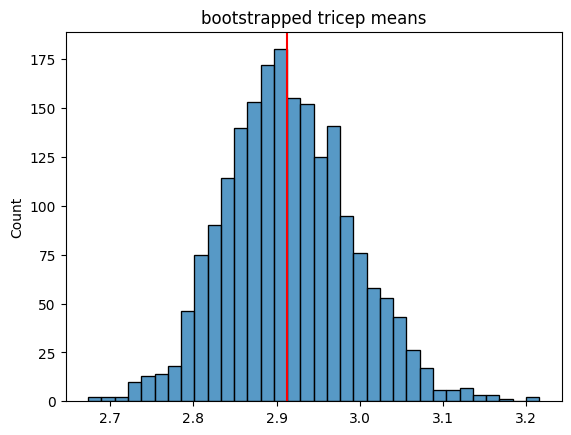

In [32]:
triceps_means = [mean['triceps'] for mean in bs_means]
original_mean=select_asym["triceps"].mean()

sns.histplot(triceps_means)
plt.axvline(original_mean, c="r")
plt.title("bootstrapped tricep means")
plt.show()

Not a perfect normal distribution but we are still working with 25 samples.  
Cant expect too much.

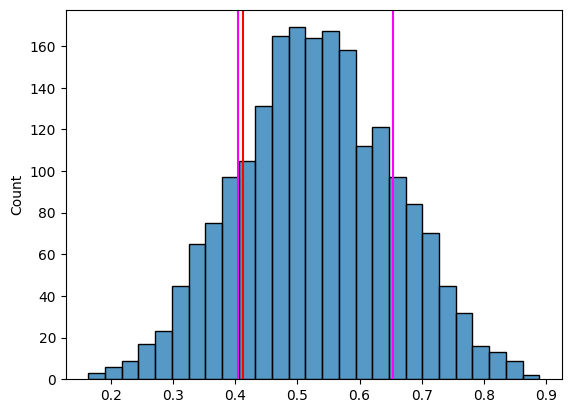

In [ ]:
#Checking bootstrapped R² values 
one_r2_std=bs_r2.std()
minus_one_std=bs_r2.mean()-one_r2_std
plus_one_std=bs_r2.mean()+one_r2_std

sns.histplot(bs_r2)
plt.axvline(r2_select_asym, c="r") #model value
plt.axvline(minus_one_std, c="magenta") #lower bound for 1std
plt.axvline(plus_one_std, c="magenta") #upper bound for 1 std
plt.show()

Our data mean was not quite in the middle but it was within one standard deviation of bootstrapped R² scores!
Really promising and most likely not a fluke.  
However I still think the R²s are too high in general. But its hard to avoid overfitting here.  

Time to check simulated slopes.

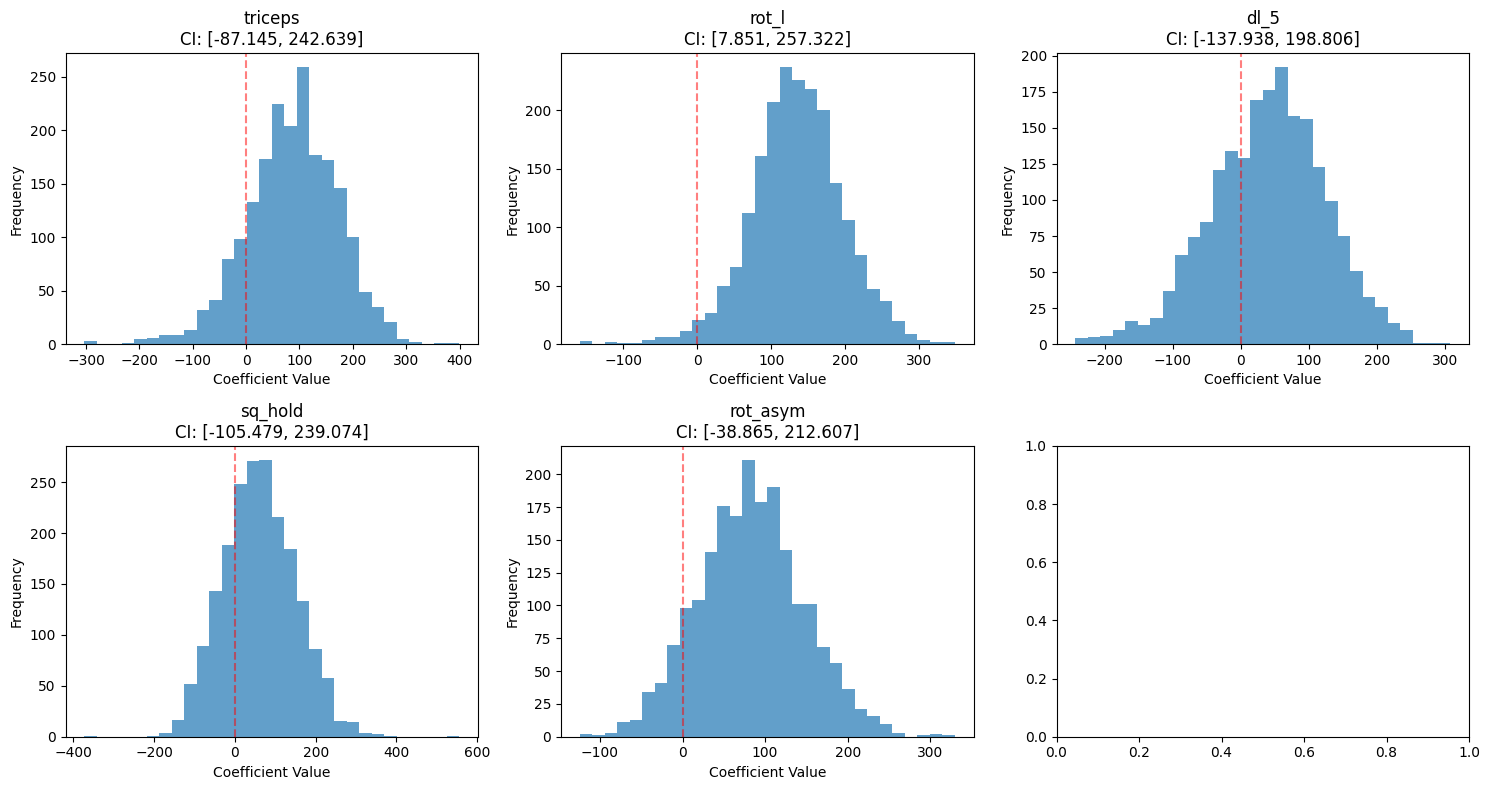

In [ ]:
coefs_boot = np.array(coefs_boot)
bs_r2 = np.array(bs_r2)
feature_names = select_asym.columns[:-1]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()


for i, feature in enumerate(feature_names):
    # Extract coefficients for given feature across all bootstrap samples
    feature_coefs = coefs_boot[:, i] #i == a given features position in coefs_boot array
    #One plot per feature
    axes[i].hist(feature_coefs, bins=30, alpha=0.7)
    axes[i].axvline(x=0, color='red', linestyle='--', alpha=0.5) #line at 0. If simulations cross this we are in trouble.
    axes[i].set_title(f"{feature}\nCI: [{np.percentile(feature_coefs, 2.5):.3f}, {np.percentile(feature_coefs, 97.5):.3f}]") #Ambitious with 95CI
    axes[i].set_xlabel("Coefficient Value")
    axes[i].set_ylabel("Frequency")
    #Symmetry bone almost want me to have selected a model with 6 slopes but rules > feelings

plt.tight_layout()
plt.show()

Looks like we can't trust individual slopes with this small sample size. 
It was a bit enthusiastic to put a 95CI but just looking at the graphs one can see that there's a huge  
overlap with simulated coefficients and crossing the 0 line. So at some level the CI value doesn't matter.

And if one stops thinking like a data scientist and starts thinking like a table tennis person you quickly realize that individual playstyle affects what slope is most relevant for you. An aggressive forehand player surely benefits from triceps, rot_l and rot asym to get those hard shots but a defensive player sits in a half squat for long rallies and benefits from squat endurance.

I think that's enough for regression stuff for now.  
I might return and run a single test at a time and check R² + statistics at a later point.  
Or possibly a huge L1 regularization.  

I'll do a decision tree and see if anything else pops up. 
Then I'll have a talk with the sports coach about potentially dropping bicep testing and how to tweak the player's training as a group.  

# Decision tree

Tree testing  
Remaking features of best model in original scale  

In [35]:
Orig_feat_base_and_asym=df[["triceps","rot_l", "dl_5", "sq_hold"]].copy()
Orig_feat_base_and_asym["rot_asym"] = (df['rot_r'] - df['rot_l']).abs() 
Orig_feat_base_and_asym["nat_rank"]=df["nat_rank"]
Orig_feat_base_and_asym_c=Orig_feat_base_and_asym.columns[:-1]
Orig_feat_base_and_asym_c

Index(['triceps', 'rot_l', 'dl_5', 'sq_hold', 'rot_asym'], dtype='object')

Rebuilding the best features in original scale

In [ ]:
Orig_feat_base_and_asym_X =Orig_feat_base_and_asym.drop("nat_rank", axis=1)
Orig_feat_base_and_asym_Y = Orig_feat_base_and_asym["nat_rank"]

table_tennis_tree=DecisionTreeRegressor(criterion='squared_error', #sq error to make things potentially more comparable to lin-reg
                                splitter='best', 
                                max_depth=2, #anything deeper and we overfit like crazy
                                min_samples_split=2, 
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                max_features=None, 
                                random_state=42, #Reproducable results
                                max_leaf_nodes=None, 
                                min_impurity_decrease=0.0, 
                                ccp_alpha=0.0, 
                                monotonic_cst=None)

table_tennis_tree.fit(Orig_feat_base_and_asym_X, Orig_feat_base_and_asym_Y)
tree_preds=table_tennis_tree.predict(Orig_feat_base_and_asym_X)

mse_tree = mean_squared_error(Orig_feat_base_and_asym_Y, tree_preds)
r2_tree = r2_score(Orig_feat_base_and_asym_Y, tree_preds)

print("\nMean Squared Error (MSE):",int(mse_tree))
print("R-squared (R²):", np.round(r2_tree,4))


Mean Squared Error (MSE): 57531
R-squared (R²): 0.5445


Too good R² but only doing 1 split seems silly

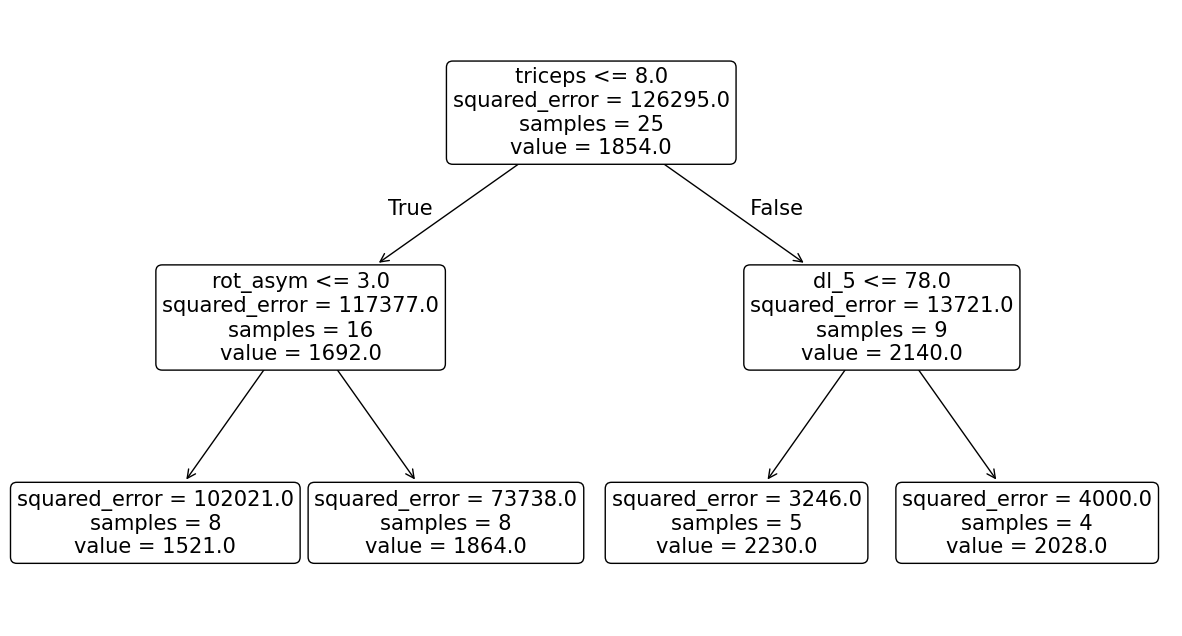

In [37]:

plt.figure(figsize=(15, 8))
tree.plot_tree(table_tennis_tree,
                feature_names=Orig_feat_base_and_asym.columns, #made sure features and labels were added
                impurity=True, 
                node_ids=False, 
                proportion=False, #added this for clearer proportion of samples/split
                rounded=True, #Nice round corners! 
                precision=0, 
                ax=None, 
                fontsize=None)
plt.show()

Split 1
Triceps weaker than 8kg  
Big split here since its the first one.  
Sort of confirmation on the fact that triceps was relevant in regression model!  

Split 2.1  
Less than 3kg asymetry in rotation  
Seems like confirmation that feature engineering has its benefits!  

Split 2.2  
Weaker than 78kg  
I think this split is too small to show any significant change, the SSE drop is nice but both groups are too close and very small "sample sizes"

*On loss function values*   
Squared errors looks huge since nat rank isnt normalized and we have to remember that:  
We should not be able to predict table tennis performance from physical tests alone!  
So its better to do rough proportional change of SSE.  

In [ ]:
# First split: triceps <= 8.0
threshold1 = 8.0
below1 = Orig_feat_base_and_asym[Orig_feat_base_and_asym['triceps'] <= threshold1]
above1 = Orig_feat_base_and_asym[Orig_feat_base_and_asym['triceps'] > threshold1]

print(f"Triceps <= {threshold1}: {len(below1)} athletes, avg value: {below1['nat_rank'].mean():.0f} ± {below1['nat_rank'].std():.0f}")
print(f"Triceps > {threshold1}: {len(above1)} athletes, avg value: {above1['nat_rank'].mean():.0f} ± {above1['nat_rank'].std():.0f}")

# Checking pvalue between groups
t_stat1, p_value1 = stats.ttest_ind(below1['nat_rank'], above1['nat_rank'])
print(f"T-test p-value: {p_value1:.3f}")
print()

# Second split: rot_asym <= 3.0 (for triceps <= 8.0 branch)
threshold2 = 3.0
below2 = Orig_feat_base_and_asym[(Orig_feat_base_and_asym['triceps'] <= 8.0) & (Orig_feat_base_and_asym['rot_asym'] <= threshold2)]
above2 = Orig_feat_base_and_asym[(Orig_feat_base_and_asym['triceps'] <= 8.0) & (Orig_feat_base_and_asym['rot_asym'] > threshold2)]

print(f"Triceps<=8.0 & Rot_asym <= {threshold2}: {len(below2)} athletes, avg value: {below2['nat_rank'].mean():.0f} ± {below2['nat_rank'].std():.0f}")
print(f"Triceps<=8.0 & Rot_asym > {threshold2}: {len(above2)} athletes, avg value: {above2['nat_rank'].mean():.0f} ± {above2['nat_rank'].std():.0f}")

# Checking pvalue between groups
t_stat2, p_value2 = stats.ttest_ind(below2['nat_rank'], above2['nat_rank'])
print(f"T-test p-value: {p_value2:.3f}")
print()

# Third split: dl_5 <= 78.0 (for triceps > 8.0 branch)
threshold3 = 78.0
below3 = Orig_feat_base_and_asym[(Orig_feat_base_and_asym['triceps'] > 8.0) & (Orig_feat_base_and_asym['dl_5'] <= threshold3)]
above3 = Orig_feat_base_and_asym[(Orig_feat_base_and_asym['triceps'] > 8.0) & (Orig_feat_base_and_asym['dl_5'] > threshold3)]

print(f"Triceps>8.0 & dl_5 <= {threshold3}: {len(below3)} athletes, avg value: {below3['nat_rank'].mean():.0f} ± {below3['nat_rank'].std():.0f}")
print(f"Triceps>8.0 & dl_5 > {threshold3}: {len(above3)} athletes, avg value: {above3['nat_rank'].mean():.0f} ± {above3['nat_rank'].std():.0f}")

# Checking pvalue between groups
t_stat3, p_value3 = stats.ttest_ind(below3['nat_rank'], above3['nat_rank'])
print(f"T-test p-value: {p_value3:.3f}")

Triceps <= 8.0: 13 athletes, avg value: 1697 ± 365
Triceps > 8.0: 12 athletes, avg value: 2023 ± 285
T-test p-value: 0.021

Triceps<=8.0 & Rot_asym <= 3.0: 8 athletes, avg value: 1521 ± 341
Triceps<=8.0 & Rot_asym > 3.0: 5 athletes, avg value: 1979 ± 185
T-test p-value: 0.019

Triceps>8.0 & dl_5 <= 78.0: 8 athletes, avg value: 2021 ± 354
Triceps>8.0 & dl_5 > 78.0: 4 athletes, avg value: 2028 ± 73
T-test p-value: 0.971


Gut instinct was right!  
Last split in True node wasn't significant.   

But really nice to see some features showing surprisingly low p values.  
Secretly, I would have been thrilled to just come close to a 0.05  
given the regression slopes instability during bootstrap and small sample size.  

Getting p = 0.021 and p = 0.019 suggests these splits capture real group differences, not just random noise.  
The tree found signal where the linear model struggled!

# Final words

I was considering doing some form of interpretation code on the feature engineered values for the regression model.  
But given the fact that the slopes did not pass the trial of bootstrap simulations I will refrain from that  
since it will give impression of inference where it is not warranted.  


It really breaks the part of my heart that still is a gymbro and powerlifter that deadlift did not perform more than mediocre at best.  
But oh well. 

More importantly. I feel quite confident in using this test battery again. Apart from biceps, have to talk to TT coach about that one. 
Would love to try on other player classes to see if results hold. I can imagine these specific results only holding for female youth.  
Maybe one would see a deadlift (dream on bro!)/rotation combo at higher levels where speed and explosiveness is a greater part of the game.

But for the final goal of making practical recommendations to coaches and players:
Time to get the defensive players to do squats and the offensive players doing 2 to 3 sets of "forehand rotation" exercises for each reverse rotation and some ecentric and/or isometric tricep work.  
That's as close to inference I will go!  